In [169]:
using JSON
using Plots
using StatsPlots
using Plots.PlotMeasures
using JLD2

In [68]:
pal = palette(:tab10);

# Load Python Results (CSDI, BRITS, CDREC)

In [7]:
csdi_results = JSON.parsefile("Python/csdi_results.json");
brits_results = JSON.parsefile("Python/brits_results.json");
cdrec_results = JSON.parsefile("Python/cdrec_results.json");

Each dictionary is nested in the following way:
- Fold (1, 2, ..., 29)
    - Percentage missing (5, 15, ..., 95)
        - Window iteration (1, 2, ..., 15)
            - MAE per test instance (1, 2, ..., 100)

Define some functions to extract relevant information:

In [47]:
# per fold, per % missing
function extract_fold_pm(results::Dict, fold_idx::Int, pm::Int)
    """
    Extract errors for a given fold and percentage missing.
    Returns pooled errors across window locations, e.g., for 100 test instances,
    each evaluated for 5% missing data and 15 possible window locations,
    will return 1500 errors once pooled.
    """
    fold_marginalised = results["$fold_idx"]
    pm_marginalised = fold_marginalised["$pm"]
    window_iter_marginalised = [pm_marginalised["$i"] for i in 0:(length(pm_marginalised)-1)]
    # pool together results from all the window locs 
    window_pool = window_iter_marginalised[1]
    for i in 2:length(window_iter_marginalised)
        window_pool = vcat(window_pool, window_iter_marginalised[i])
    end
    return window_pool
end

extract_fold_pm (generic function with 1 method)

# CSDI

In [82]:
per_fold_means_5 = [mean(extract_fold_pm(csdi_results, fold, 5)) for fold in 0:29];
per_fold_stds_5 = [std(extract_fold_pm(csdi_results, fold, 5)) for fold in 0:29];
per_fold_means_35 = [mean(extract_fold_pm(csdi_results, fold, 35)) for fold in 0:29];
per_fold_stds_35 = [std(extract_fold_pm(csdi_results, fold, 35)) for fold in 0:29];
per_fold_means_65 = [mean(extract_fold_pm(csdi_results, fold, 65)) for fold in 0:29];
per_fold_stds_65 = [std(extract_fold_pm(csdi_results, fold, 65)) for fold in 0:29];
per_fold_means_95 = [mean(extract_fold_pm(csdi_results, fold, 95)) for fold in 0:29];
per_fold_stds_95 = [std(extract_fold_pm(csdi_results, fold, 95)) for fold in 0:29];

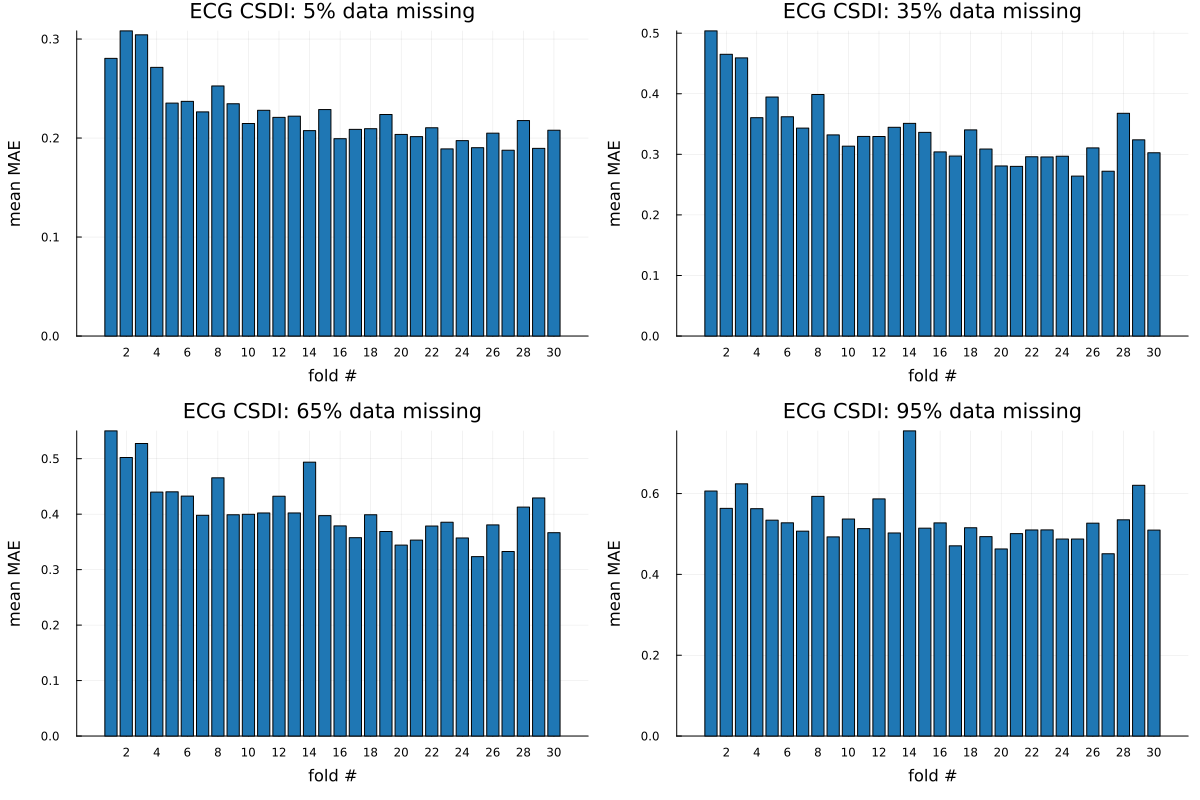

In [83]:
p1 = bar(collect(1:30), per_fold_means_5, legend=:none, xlabel="fold #",
    ylabel="mean MAE", title="ECG CSDI: 5% data missing", c=pal[1],
    xticks=collect(2:2:30))
p2 = bar(collect(1:30), per_fold_means_35, legend=:none, xlabel="fold #",
    ylabel="mean MAE", title="ECG CSDI: 35% data missing", c=pal[1],
    xticks=collect(2:2:30))
p3 = bar(collect(1:30), per_fold_means_65, legend=:none, xlabel="fold #",
    ylabel="mean MAE", title="ECG CSDI: 65% data missing", c=pal[1],
    xticks=collect(2:2:30))
p4 = bar(collect(1:30), per_fold_means_95, legend=:none, xlabel="fold #",
    ylabel="mean MAE", title="ECG CSDI: 95% data missing", c=pal[1],
    xticks=collect(2:2:30))
plot(p1, p2, p3, p4, size=(1200, 800), bottom_margin=5mm, left_margin=5mm)

Mean across folds per % data missing:

In [136]:
csdi_mean_per_pm = [mean([mean(extract_fold_pm(csdi_results, fold, pm)) for fold in 0:29]) for pm in 5:10:95]
# standard error
csdi_std_per_pm = [std([mean(extract_fold_pm(csdi_results, fold, pm)) for fold in 0:29]) for pm in 5:10:95]/sqrt(30)
# 95 CI
csdi_ci95_per_pm = 1.96 * std_per_pm;

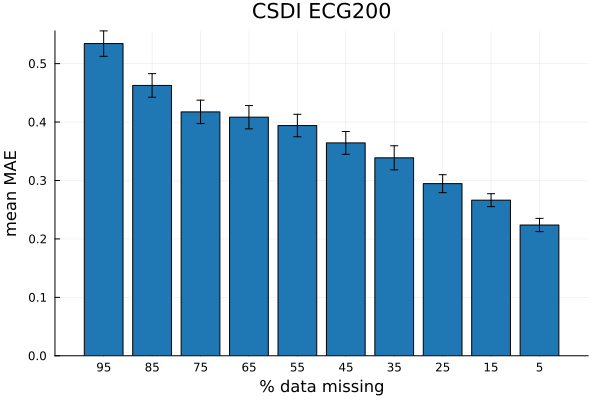

In [137]:
bar(csdi_mean_per_pm, yerr=csdi_ci95_per_pm, 
    xlabel="% data missing", label="", ylabel="mean MAE",
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    title="CSDI ECG200", c=pal[1])
xflip!(true)
#savefig("csdi_ecg200_pm.svg")

# BRITS

In [112]:
br_per_fold_means_5 = [mean(extract_fold_pm(brits_results, fold, 5)) for fold in 0:29];
br_per_fold_stds_5 = [std(extract_fold_pm(brits_results, fold, 5)) for fold in 0:29];
br_per_fold_means_35 = [mean(extract_fold_pm(brits_results, fold, 35)) for fold in 0:29];
br_per_fold_stds_35 = [std(extract_fold_pm(brits_results, fold, 35)) for fold in 0:29];
br_per_fold_means_65 = [mean(extract_fold_pm(brits_results, fold, 65)) for fold in 0:29];
br_per_fold_stds_65 = [std(extract_fold_pm(brits_results, fold, 65)) for fold in 0:29];
br_per_fold_means_95 = [mean(extract_fold_pm(brits_results, fold, 95)) for fold in 0:29];
br_per_fold_stds_95 = [std(extract_fold_pm(brits_results, fold, 95)) for fold in 0:29];

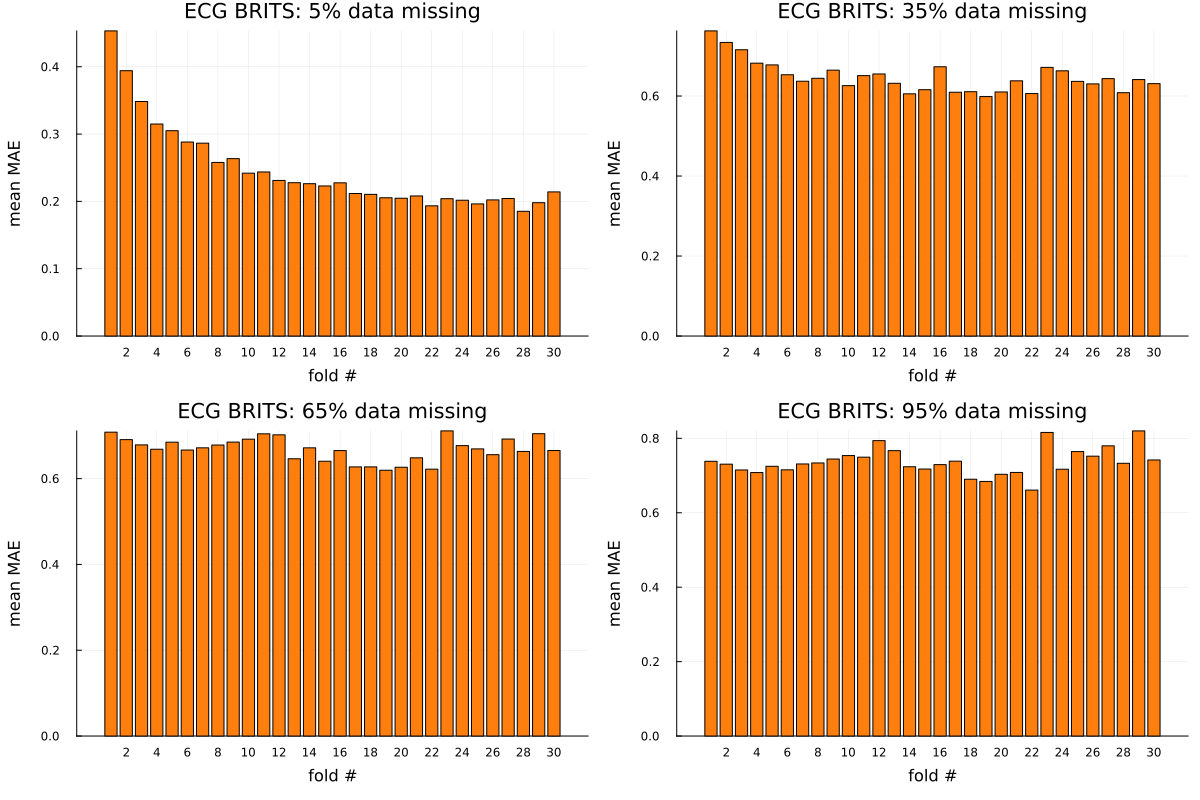

In [114]:
p1 = bar(collect(1:30), br_per_fold_means_5, legend=:none, xlabel="fold #",
    ylabel="mean MAE", title="ECG BRITS: 5% data missing", c=pal[2],
    xticks=collect(2:2:30))
p2 = bar(collect(1:30), br_per_fold_means_35, legend=:none, xlabel="fold #",
    ylabel="mean MAE", title="ECG BRITS: 35% data missing", c=pal[2],
    xticks=collect(2:2:30))
p3 = bar(collect(1:30), br_per_fold_means_65, legend=:none, xlabel="fold #",
    ylabel="mean MAE", title="ECG BRITS: 65% data missing", c=pal[2],
    xticks=collect(2:2:30))
p4 = bar(collect(1:30), br_per_fold_means_95, legend=:none, xlabel="fold #",
    ylabel="mean MAE", title="ECG BRITS: 95% data missing", c=pal[2],
    xticks=collect(2:2:30))
plot(p1, p2, p3, p4, size=(1200, 800), bottom_margin=5mm, left_margin=5mm)

In [139]:
brits_mean_per_pm = [mean([mean(extract_fold_pm(brits_results, fold, pm)) for fold in 0:29]) for pm in 5:10:95]
# standard error
brits_std_per_pm = [std([mean(extract_fold_pm(brits_results, fold, pm)) for fold in 0:29]) for pm in 5:10:95]/sqrt(30)
# 95 CI
brits_ci95_per_pm = 1.96 * std_per_pm;

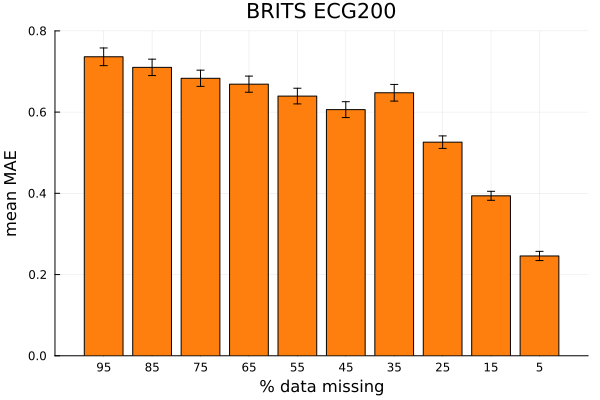

In [140]:
bar(brits_mean_per_pm, yerr=brits_ci95_per_pm, 
    xlabel="% data missing", label="", ylabel="mean MAE",
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    title="BRITS ECG200", c=pal[2],
    ylims=(0, 0.8))
xflip!(true)
#savefig("brits_ecg200_pm.svg")

# CDREC

In [125]:
cd_per_fold_means_5 = [mean(extract_fold_pm(cdrec_results, fold, 5)) for fold in 0:29];
cd_per_fold_stds_5 = [std(extract_fold_pm(cdrec_results, fold, 5)) for fold in 0:29];
cd_per_fold_means_35 = [mean(extract_fold_pm(cdrec_results, fold, 35)) for fold in 0:29];
cd_per_fold_stds_35 = [std(extract_fold_pm(cdrec_results, fold, 35)) for fold in 0:29];
cd_per_fold_means_65 = [mean(extract_fold_pm(cdrec_results, fold, 65)) for fold in 0:29];
cd_per_fold_stds_65 = [std(extract_fold_pm(cdrec_results, fold, 65)) for fold in 0:29];
cd_per_fold_means_95 = [mean(extract_fold_pm(cdrec_results, fold, 95)) for fold in 0:29];
cd_per_fold_stds_95 = [std(extract_fold_pm(cdrec_results, fold, 95)) for fold in 0:29];

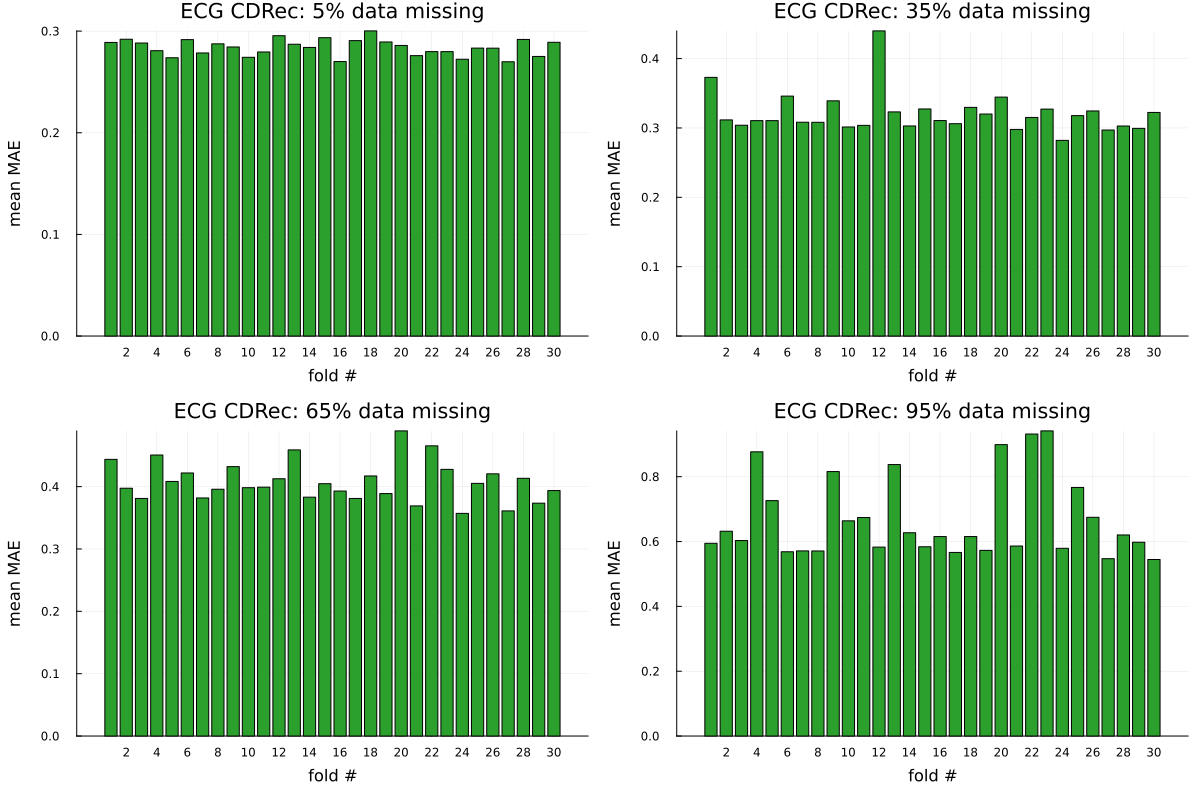

In [126]:
p1 = bar(collect(1:30), cd_per_fold_means_5, legend=:none, xlabel="fold #",
    ylabel="mean MAE", title="ECG CDRec: 5% data missing", c=pal[3],
    xticks=collect(2:2:30))
p2 = bar(collect(1:30), cd_per_fold_means_35, legend=:none, xlabel="fold #",
    ylabel="mean MAE", title="ECG CDRec: 35% data missing", c=pal[3],
    xticks=collect(2:2:30))
p3 = bar(collect(1:30), cd_per_fold_means_65, legend=:none, xlabel="fold #",
    ylabel="mean MAE", title="ECG CDRec: 65% data missing", c=pal[3],
    xticks=collect(2:2:30))
p4 = bar(collect(1:30), cd_per_fold_means_95, legend=:none, xlabel="fold #",
    ylabel="mean MAE", title="ECG CDRec: 95% data missing", c=pal[3],
    xticks=collect(2:2:30))
plot(p1, p2, p3, p4, size=(1200, 800), bottom_margin=5mm, left_margin=5mm)

In [127]:
cdrec_mean_per_pm = [mean([mean(extract_fold_pm(cdrec_results, fold, pm)) for fold in 0:29]) for pm in 5:10:95]
# standard error
cdrec_std_per_pm = [std([mean(extract_fold_pm(cdrec_results, fold, pm)) for fold in 0:29]) for pm in 5:10:95]/sqrt(30)
# 95 CI
cdrec_ci95_per_pm = 1.96 * std_per_pm;

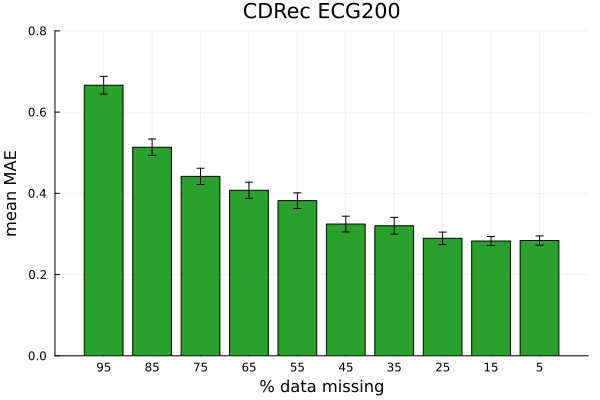

In [131]:
bar(cdrec_mean_per_pm, yerr=cdrec_ci95_per_pm, 
    xlabel="% data missing", label="", ylabel="mean MAE",
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    title="CDRec ECG200", c=pal[3],
    ylims=(0, 0.8))
xflip!(true)
#savefig("cdrec_ecg200_pm.svg")

# Combined Results

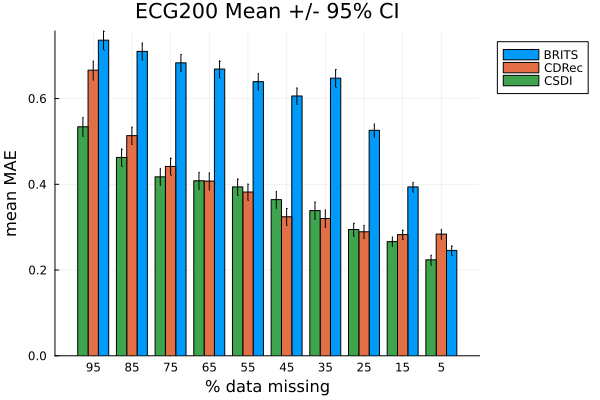

In [167]:
groupedbar([brits_mean_per_pm cdrec_mean_per_pm csdi_mean_per_pm ],
    yerr=[brits_ci95_per_pm cdrec_ci95_per_pm csdi_ci95_per_pm],
    markersize=0,
    legend=:outertopright, 
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["BRITS" "CDRec" "CSDI"], 
    title="ECG200 Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE")
xflip!(true)
#savefig("combined_imputers.svg")

# Load Julia Results (MPS/NN)

In [172]:
pwd()

"/Users/joshua/Desktop/QuantumInspiredML/FinalBenchmarks/ECG200"

In [174]:
f = jldopen("Julia/ecg_benchmark_trial.jld2", "r");
per_fold_mps = read(f, "per_fold_mps")
per_fold_nn = read(f, "per_fold_nn")
close(f)

define functions to extract results

In [213]:
function extract_fold_pm_jl(results, fold_idx, pm)
    pm_to_idx = Dict(5 => 1, 15 => 2, 25 => 3, 35 => 4, 45 => 5, 55 => 6, 65 => 7, 75 => 9, 85 => 9, 95 => 10)
    # same functionality as extract_fold_pm but for julia results 
    fold_marginalised = results[fold_idx]
    pm_marginalised = [fold_marginalised[instance][pm_to_idx[pm]] for instance in 1:length(fold_marginalised)]
    # pool together result for all instances
    pooled = pm_marginalised[1]
    for i in 2:length(pm_marginalised)
        pooled = vcat(pooled, pm_marginalised[i])
    end
    return pooled
end

extract_fold_pm_jl (generic function with 1 method)

In [225]:
nn_mean_per_pm = [mean([mean(extract_fold_pm_jl(per_fold_nn, fold, pm)) for fold in 1:30]) for pm in 5:10:95]
nn_std_per_pm = [std([mean(extract_fold_pm_jl(per_fold_nn, fold, pm)) for fold in 1:30]) for pm in 5:10:95]/sqrt(30)
nn_ci95_per_pm = 1.96 * std_per_pm;

In [229]:
mps_mean_per_pm = [mean([mean(extract_fold_pm_jl(per_fold_mps, fold, pm)) for fold in 1:30]) for pm in 5:10:95]
mps_std_per_pm = [std([mean(extract_fold_pm_jl(per_fold_mps, fold, pm)) for fold in 1:30]) for pm in 5:10:95]/sqrt(30)
mps_ci95_per_pm = 1.96 * std_per_pm;

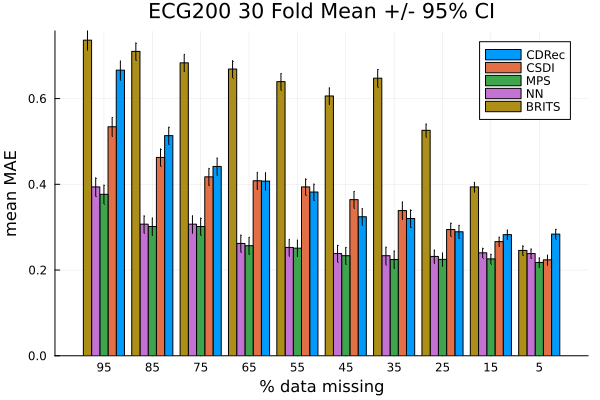

In [255]:
groupedbar([cdrec_mean_per_pm csdi_mean_per_pm mps_mean_per_pm nn_mean_per_pm brits_mean_per_pm],
    yerr=[cdrec_ci95_per_pm csdi_ci95_per_pm mps_ci95_per_pm nn_ci95_per_pm brits_ci95_per_pm],
    markersize=0, 
    legend=:topright,
    bar_width=0.85,
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["CDRec" "CSDI" "MPS" "NN" "BRITS"], 
    title="ECG200 30 Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE")
xflip!(true)
#savefig("combined_imputers_all.svg")